In [1]:
import wget

ModuleNotFoundError: No module named 'wget'

In [2]:
from pip._internal import main
main(['install', 'wget'])
import wget

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=d9478a31f868c22c43215f9e5a5b4ac21263125aac30c00459422dcde207ad4b
  Stored in directory: c:\users\jon\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [3]:
try:
    import wget
except: 
    from pip._internal import main
    main(['install', 'wget'])
    import wget

In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
try:
    import pandas_datareader.data as web
except: 
    from pip._internal import main
    main(['install', 'pandas_datareader'])
    import pandas_datareader.data as web

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [6]:
style.use('ggplot')

In [7]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

In [49]:
class YahooDailyReader():
    
    def __init__(self, symbol=None, start=None, end=None):
        import datetime, time
        
        self.symbol = symbol
        
        # initialize start/end dates if not provided
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(2010,1,1)
        
        self.start = start
        self.end = end
        

        
    def read(self):
        import requests, re, json
        try:
            import yfinance
        except: 
            from pip._internal import main
            main(['install', 'yfinance'])
            import yfinance   
        
        r = yfinance.Ticker(self.symbol)
        history = r.history(start=self.start, end=self.end, interval="1d", frequency="1d")
        
        df = pd.DataFrame(history)
        
        df.insert(0, 'symbol', self.symbol)

        df = df.dropna(subset=['Close'])
        
        df = df.reset_index()
        
        df = df.rename(columns={ "Date": "date", 
                           "High": "high",
                           "Low": "low",
                           "Open": "open",
                           "Close": "close",
                           "Volume": "volume"})
        
        df = df[['symbol', 'date', 'high', 'low', 'open', 'close', 'volume']]
        df = df.set_index('symbol')
        return df

In [51]:
ydr = YahooDailyReader('TSLA')
df = ydr.read()

In [52]:
print(df.head(6))

             date   high    low   open  close    volume
symbol                                                 
TSLA   2010-06-29  5.000  3.508  3.800  4.778  93831500
TSLA   2010-06-30  6.084  4.660  5.158  4.766  85935500
TSLA   2010-07-01  5.184  4.054  5.000  4.392  41094000
TSLA   2010-07-02  4.620  3.742  4.600  3.840  25699000
TSLA   2010-07-06  4.000  3.166  4.000  3.222  34334500
TSLA   2010-07-07  3.326  2.996  3.280  3.160  34608500


In [53]:
print(df['open'][0:5])

symbol
TSLA    3.800
TSLA    5.158
TSLA    5.000
TSLA    4.600
TSLA    4.000
Name: open, dtype: float64


In [54]:
df.to_csv('tesla.csv')

In [55]:
df = pd.read_csv('tesla.csv')

In [56]:
print(df.head())

  symbol        date   high    low   open  close    volume
0   TSLA  2010-06-29  5.000  3.508  3.800  4.778  93831500
1   TSLA  2010-06-30  6.084  4.660  5.158  4.766  85935500
2   TSLA  2010-07-01  5.184  4.054  5.000  4.392  41094000
3   TSLA  2010-07-02  4.620  3.742  4.600  3.840  25699000
4   TSLA  2010-07-06  4.000  3.166  4.000  3.222  34334500


In [57]:
df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)

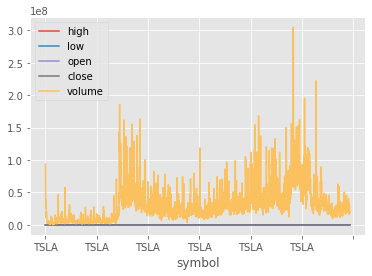

In [58]:
df.plot()
plt.show()

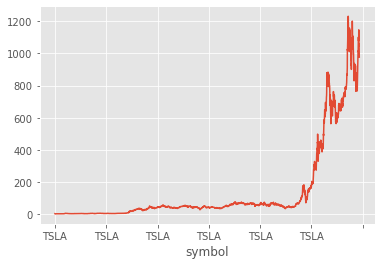

In [59]:
df['close'].plot()
plt.show()

In [60]:
print(df['close'])

symbol
TSLA       4.778000
TSLA       4.766000
TSLA       4.392000
TSLA       3.840000
TSLA       3.222000
           ...     
TSLA    1091.260010
TSLA    1045.760010
TSLA    1057.260010
TSLA    1025.489990
TSLA     975.929993
Name: close, Length: 2968, dtype: float64


In [61]:
print(df[['open', 'high']].head())

         open   high
symbol              
TSLA    3.800  5.000
TSLA    5.158  6.084
TSLA    5.000  5.184
TSLA    4.600  4.620
TSLA    4.000  4.000


In [62]:
# These graphs show that Tesla has done quite well as a company over the past few years! They 
# have seen tremendous growth, an although there have been a few dips, have been consistently 
# been on the upswing.

In [63]:
# To make this program more viable, I would add the ability to compare multiple stocks, or 
# compare stocks against a tracking index such as the S&P 500. This would allow me to see if 
# any correlations exists, and to see if a company’s growth was in line with the current economic 
# growth, or if they outperformed/underperformed the market.

## Jonathan Doolittle